In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
label_encoder = LabelEncoder()

In [6]:
# encoding male as 1 and female as 0
df['gender'] = label_encoder.fit_transform(df['gender'])


In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [8]:
# normalising parameters with largely varying values
df['age_norm'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['bmi_norm'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df['HbA1c_level_norm'] = (df['HbA1c_level'] - df['HbA1c_level'].mean()) / df['HbA1c_level'].std()
df['blood_glucose_level_norm'] = (df['blood_glucose_level'] - df['blood_glucose_level'].mean()) / df['blood_glucose_level'].std()

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_norm,bmi_norm,HbA1c_level_norm,blood_glucose_level_norm
0,0,80.0,0,1,never,25.19,6.6,140,0,1.692695,-0.321054,1.001701,0.047704
1,0,54.0,0,0,No Info,27.32,6.6,80,0,0.538004,-0.000116,1.001701,-1.426203
2,1,28.0,0,0,never,27.32,5.7,158,0,-0.616688,-0.000116,0.161107,0.489876
3,0,36.0,0,0,current,23.45,5.0,155,0,-0.261398,-0.583229,-0.492688,0.416181
4,1,76.0,1,1,current,20.14,4.8,155,0,1.515050,-1.081965,-0.679486,0.416181


In [10]:
selected_columns = ['gender', 'age_norm', 'hypertension','heart_disease','bmi_norm','HbA1c_level_norm','blood_glucose_level_norm','diabetes']
df_final = df[selected_columns]
df_final


,gender,age_norm,hypertension,heart_disease,bmi_norm,HbA1c_level_norm,blood_glucose_level_norm,diabetes
0,0,1.692695,0,1,-0.321054,1.001701,0.047704,0
1,0,0.538004,0,0,-0.000116,1.001701,-1.426203,0
2,1,-0.616688,0,0,-0.000116,0.161107,0.489876,0
3,0,-0.261398,0,0,-0.583229,-0.492688,0.416181,0
4,1,1.515050,1,1,-1.081965,-0.679486,0.416181,0
...,...,...,...,...,...,...,...,...
99995,0,1.692695,0,0,-0.000116,0.628104,-1.180552,0
99996,0,-1.771379,0,0,-1.499336,0.908301,-0.934901,0
99997,1,1.070938,0,0,0.076729,0.161107,0.416181,0
99998,0,-0.794332,0,0,1.220355,-1.426681,-0.934901,0


In [11]:
# normalized dataset is ready
df_final

,gender,age_norm,hypertension,heart_disease,bmi_norm,HbA1c_level_norm,blood_glucose_level_norm,diabetes
0,0,1.692695,0,1,-0.321054,1.001701,0.047704,0
1,0,0.538004,0,0,-0.000116,1.001701,-1.426203,0
2,1,-0.616688,0,0,-0.000116,0.161107,0.489876,0
3,0,-0.261398,0,0,-0.583229,-0.492688,0.416181,0
4,1,1.515050,1,1,-1.081965,-0.679486,0.416181,0
...,...,...,...,...,...,...,...,...
99995,0,1.692695,0,0,-0.000116,0.628104,-1.180552,0
99996,0,-1.771379,0,0,-1.499336,0.908301,-0.934901,0
99997,1,1.070938,0,0,0.076729,0.161107,0.416181,0
99998,0,-0.794332,0,0,1.220355,-1.426681,-0.934901,0


In [12]:
#checking for null values in df
print(df_final.isnull().sum())
print(df_final.dtypes)

gender                      0
age_norm                    0
hypertension                0
heart_disease               0
bmi_norm                    0
HbA1c_level_norm            0
blood_glucose_level_norm    0
diabetes                    0
dtype: int64
gender                        int64
age_norm                    float64
hypertension                  int64
heart_disease                 int64
bmi_norm                    float64
HbA1c_level_norm            float64
blood_glucose_level_norm    float64
diabetes                      int64
dtype: object


In [13]:
X = df_final.drop(columns=['diabetes'])
Y = df_final['diabetes']
# taking 70 % of data as training set and remaining 30 %  of data as testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [14]:
train_df

,gender,age_norm,hypertension,heart_disease,bmi_norm,HbA1c_level_norm,blood_glucose_level_norm,diabetes
0,1,0.315948,0,0,-0.000116,-0.492688,0.416181,0
1,1,0.982116,0,0,-0.000116,-1.893677,0.170530,0
2,0,-0.794332,0,0,-0.000116,-1.893677,-0.197947,0
3,0,0.582415,0,0,-0.000116,0.908301,0.514441,0
4,1,-1.238444,0,0,-0.955398,0.628104,-1.303377,0
...,...,...,...,...,...,...,...,...
69995,1,0.315948,0,0,0.852707,0.161107,-1.426203,0
69996,0,-1.194033,0,0,0.117411,-0.492688,0.514441,0
69997,1,0.005069,0,0,-0.177913,0.254506,-1.303377,0
69998,0,-0.216987,0,0,-0.355710,0.628104,0.489876,0


In [15]:
#df.to_csv('output.csv', index=False)

In [16]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [18]:
def he_weights(input_size, output_size):
    limit = np.sqrt(2 / input_size)
    return np.random.randn(input_size, output_size) * limit
    # he weights is chosen for hidden layer as function is leaky relu and xavier wights are chosen for output layer as layer is sigmoid

In [19]:
def xavier_weights(input_size, output_size):
    stddev = np.sqrt(2 / (input_size + output_size))
    weights = np.random.normal(0, stddev, (input_size, output_size))
    return weights

In [20]:
# making a batch by selecting 'batch_size' number of samples from the training dataset
def batches_making(df_final, batch_size):
    m = df_final.shape[0]
    batches = []
    for i in range(0, m, batch_size):
        X_batch = df_final[i:i + batch_size]
        batches.append(X_batch)

    return batches

In [21]:
np.random.seed(1)
W1 = he_weights(7, 10)
b1 = np.zeros((1, 10))

In [22]:
W2 = xavier_weights(10, 1)
b2 = np.zeros((1, 1))

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [24]:
def sigmoid_derivative(yhat):
    return yhat * (1 - yhat)


In [25]:
def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)


In [26]:
def leaky_relu_derivative(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

In [27]:
# using binary cross entropy loess since aim is binary classification
def binary_cross_entropy_loss(yhat, Y):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(yhat) + (1 - Y) * np.log(1 - yhat)) / m
    return loss

In [28]:
# backward propagation using batch gradient descent
def backward_propagation(X_batch, Y_batch, a1, yhat, W2, z1):
    m = X_batch.shape[0]
    dZ2 = yhat- Y_batch  # 250 *1 here
    dW2 = np.dot(a1.T, dZ2) / m  # 10 * 1 here
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # 1 *1
    da1 = np.dot(dZ2, W2.T)  # 250*10
    dz1 = da1 * leaky_relu_derivative(z1)  # 250*10
    dW1 = np.dot(X_batch.T, dz1) / m  # 7*10
    db1 = np.sum(dz1, axis=0, keepdims=True) / m  # 1*1
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1- learning_rate * dW1
    b1 = b1- learning_rate * db1
    W2 = W2- learning_rate * dW2
    b2 = b2- learning_rate * db2
    return W1, b1, W2, b2

In [29]:
def forward_propagation(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = leaky_relu(z1)
    z2 = np.dot(a1, W2) + b2
    yhat = sigmoid(z2)
    return z1, a1, z2, yhat

In [30]:
def train(df_final, W1, b1, W2, b2, batch_size, learning_rate, epochs):
    losses = []
    for epoch in range(epochs):
        df_final = df_final.sample(frac=1).reset_index(drop=True)
        X = df_final.drop(columns=['diabetes']).values
        Y = df_final['diabetes'].values.reshape(-1, 1)
        batches = batches_making(X, batch_size)
        y_batches = batches_making(Y, batch_size)
        epoch_loss = 0
        for X_batch, Y_batch in zip(batches, y_batches):
            z1, a1, z2,yhat=forward_propagation(X_batch,W1, b1, W2, b2)
            batch_loss = binary_cross_entropy_loss(yhat, Y_batch)
            epoch_loss = epoch_loss+ batch_loss

            dW1, db1, dW2, db2 = backward_propagation(X_batch, Y_batch, a1, yhat, W2, z1)            #backward propogation
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        epoch_loss /= len(batches)
        losses.append(epoch_loss)

        print(f'Epoch number {epoch + 1} out of {epochs} -> Loss: {epoch_loss}')
    return W1, b1, W2, b2, losses


In [31]:
batch_size=250
epochs=100
learning_rate=0.01
W1, b1, W2, b2, losses = train(train_df, W1, b1, W2, b2, batch_size, learning_rate, epochs)


Epoch number 1 out of 100 -> Loss: 0.40246561428553
Epoch number 2 out of 100 -> Loss: 0.25873618387099945
Epoch number 3 out of 100 -> Loss: 0.21152179324742792
Epoch number 4 out of 100 -> Loss: 0.18677969665916955
Epoch number 5 out of 100 -> Loss: 0.17164034405860012
Epoch number 6 out of 100 -> Loss: 0.16138977596319015
Epoch number 7 out of 100 -> Loss: 0.1539783428264314
Epoch number 8 out of 100 -> Loss: 0.148322491782413
Epoch number 9 out of 100 -> Loss: 0.14384461555560213
Epoch number 10 out of 100 -> Loss: 0.14017487769806578
Epoch number 11 out of 100 -> Loss: 0.13710033200367297
Epoch number 12 out of 100 -> Loss: 0.13448180387759792
Epoch number 13 out of 100 -> Loss: 0.1322249533999623
Epoch number 14 out of 100 -> Loss: 0.1302589177009482
Epoch number 15 out of 100 -> Loss: 0.12853857048922082
Epoch number 16 out of 100 -> Loss: 0.12701528182947247
Epoch number 17 out of 100 -> Loss: 0.1256629111833149
Epoch number 18 out of 100 -> Loss: 0.12446197005055905
Epoch numb

In [32]:
ep=[]
for i in range(epochs):
  ep.append(i+1)

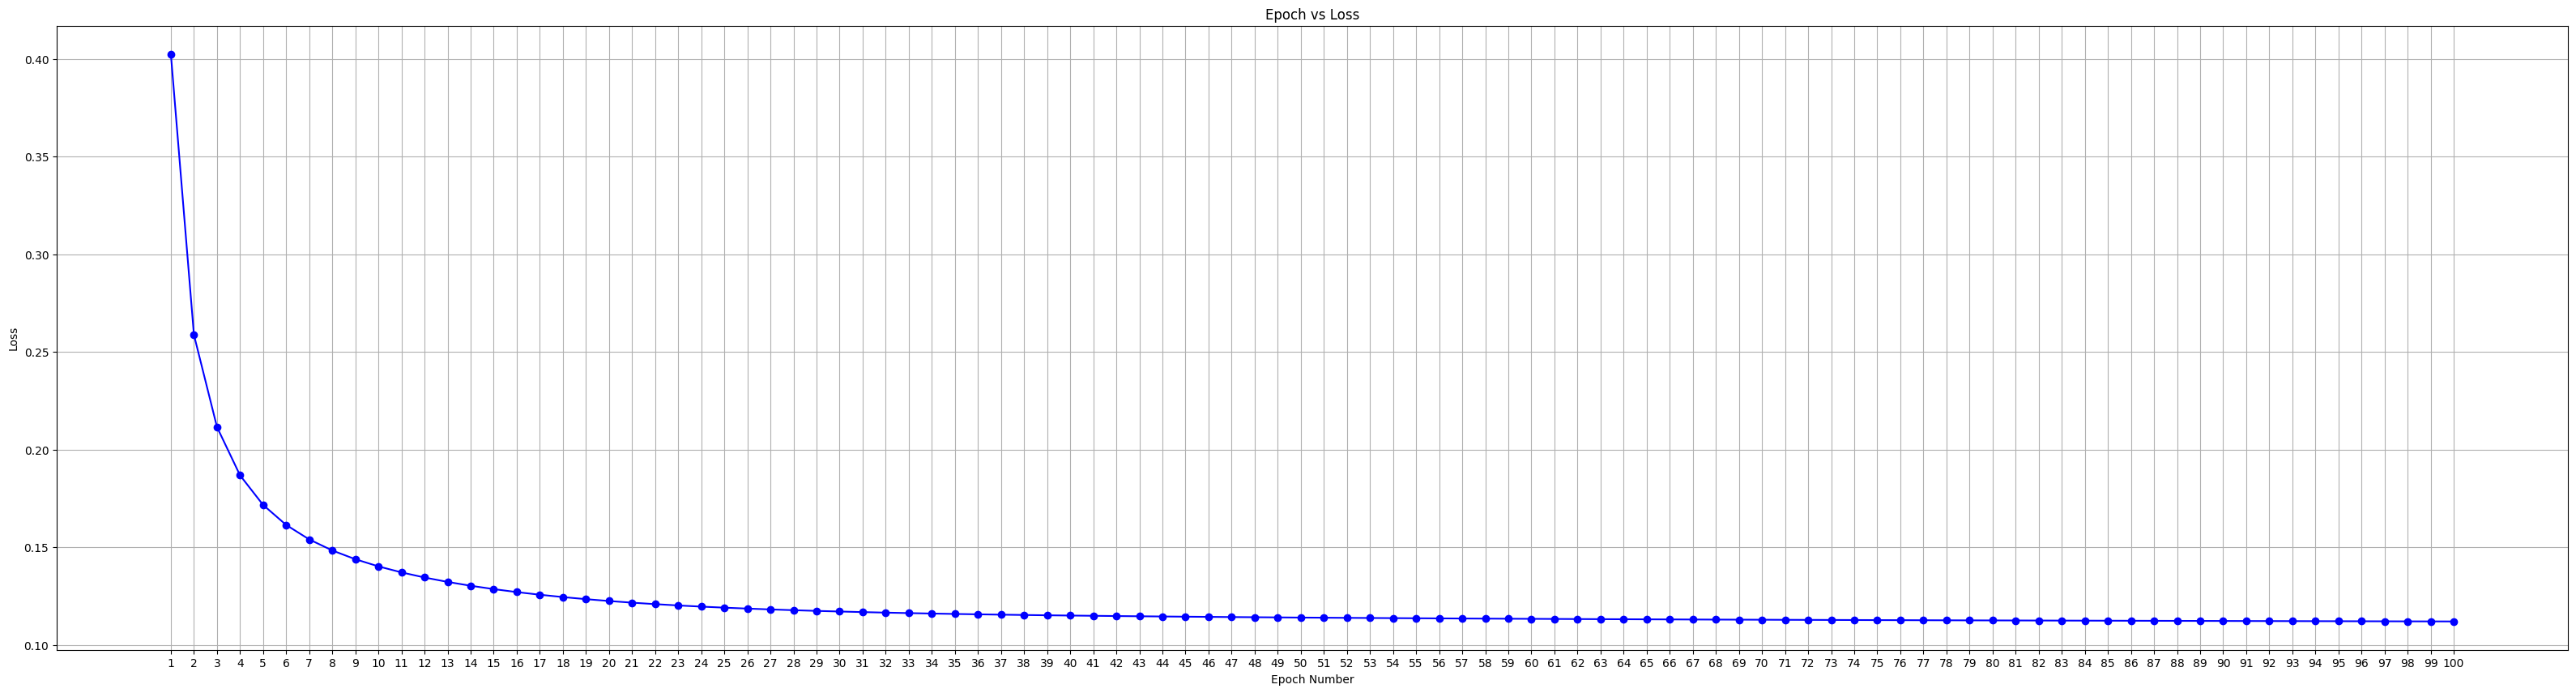

In [33]:
plt.figure(figsize=(40, 10))
plt.plot(ep, losses, marker='o', linestyle='-', color='b')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.xticks(ep)
plt.grid()
plt.show()

In [34]:
# print(np.array(ep).shape)
# print(np.array(losses).shape)

In [35]:
df_final.head()

,gender,age_norm,hypertension,heart_disease,bmi_norm,HbA1c_level_norm,blood_glucose_level_norm,diabetes
0,0,1.692695,0,1,-0.321054,1.001701,0.047704,0
1,0,0.538004,0,0,-0.000116,1.001701,-1.426203,0
2,1,-0.616688,0,0,-0.000116,0.161107,0.489876,0
3,0,-0.261398,0,0,-0.583229,-0.492688,0.416181,0
4,1,1.515050,1,1,-1.081965,-0.679486,0.416181,0


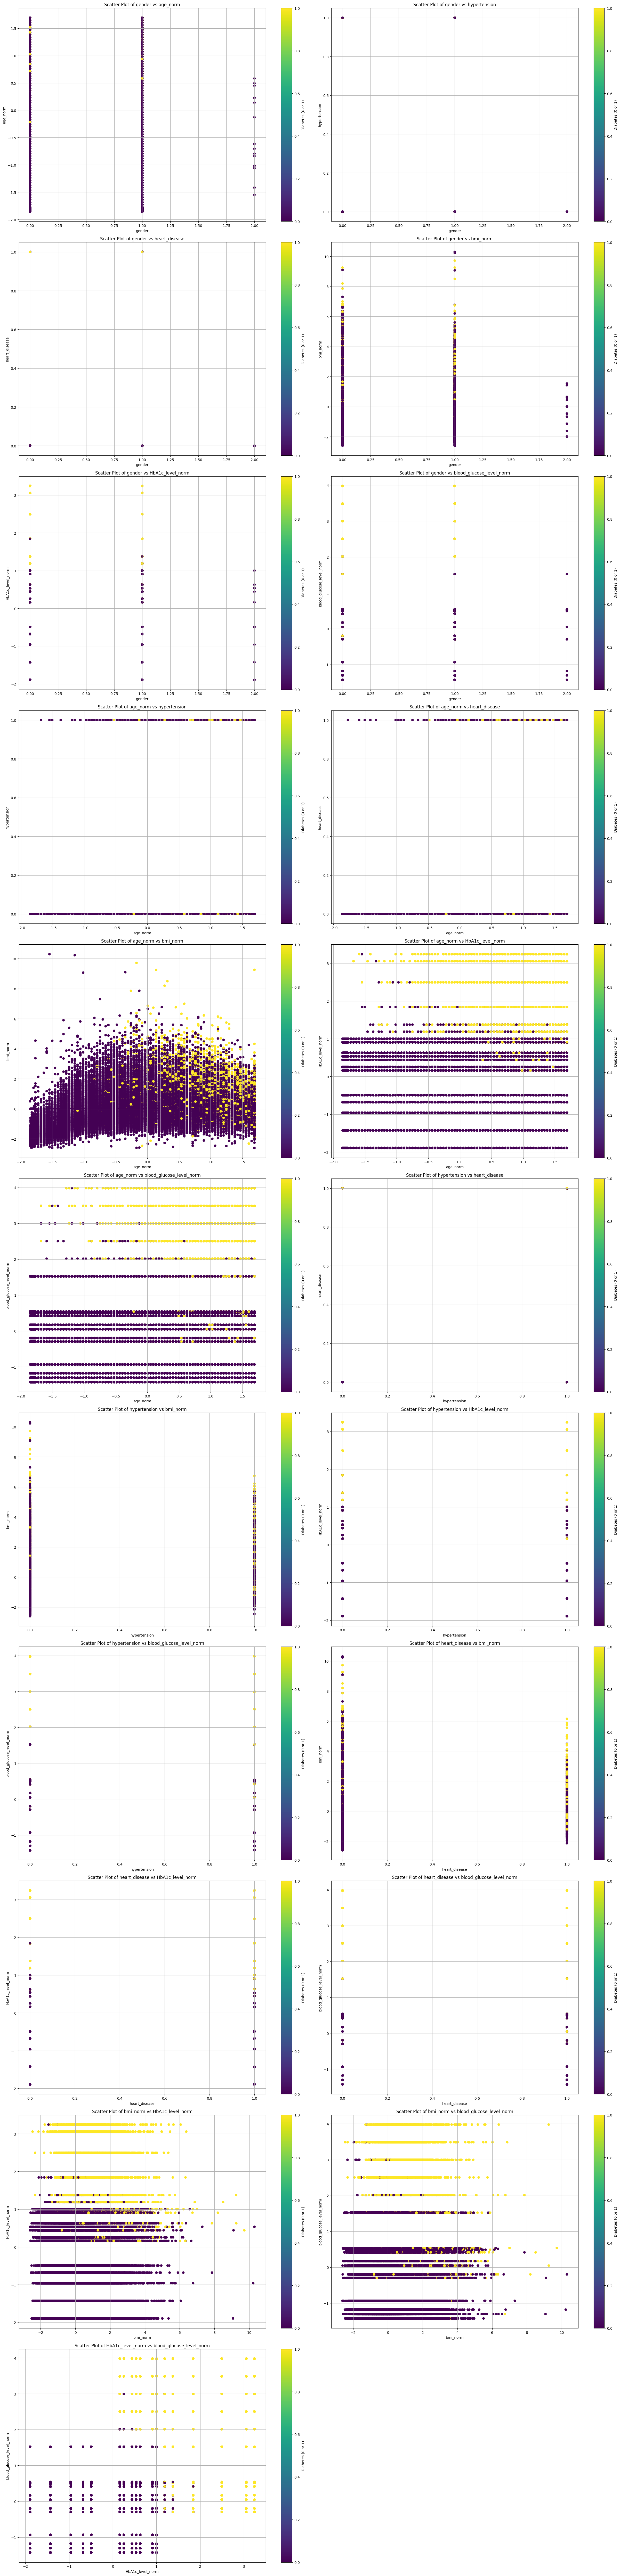

In [36]:
plt.figure(figsize=(25, 100))
coli=['gender', 'age_norm', 'hypertension','heart_disease','bmi_norm','HbA1c_level_norm','blood_glucose_level_norm']
feature_number = len(coli)
X_without_diabetes = df_final.drop(columns=['diabetes']).values
z1, a1, z2, yhat=forward_propagation(X_without_diabetes, W1, b1, W2, b2)
total = (feature_number * (feature_number - 1)) // 2
colm = 2
row = math.ceil(total / colm)

yhat_array = np.array(yhat)
yhat01= (yhat_array >= 0.5).astype(int)

plot_index = 1
for i in range(feature_number):
    for j in range(i + 1, feature_number):
        plt.subplot(row, colm, plot_index)
        f1 = coli[i]
        f2 = coli[j]
        plt.scatter(df_final[f1], df_final[f2],c=yhat01)
        plt.title(f'Scatter Plot of {f1} vs {f2}')
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.colorbar(label='Diabetes (0 or 1)')
        plt.grid(True)

        plot_index += 1

plt.tight_layout()
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [37]:
y_test.shape

(30000,)

In [38]:
X_test.shape

(30000, 7)

In [39]:
z1, a1, z2,yhat=forward_propagation(X_test,W1, b1, W2, b2)
y_pred = (yhat >= 0.5).astype(int)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Accuracy in percentage is: {accuracy*100} %')

Accuracy: 0.9613
Accuracy in percentage is: 96.13000000000001 %
